<a href="https://colab.research.google.com/github/kilgorjn/CS_5300_AI/blob/main/CS_5300_Abalone_Phase_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase I (from previous assignment)

In [ ]:
import urllib.request
import os
import pandas as pd
from sklearn import preprocessing
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import timeit


if 'abalone.data' not in os.listdir():
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
if 'abalone.names' not in os.listdir():
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names


feature_names = ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight']
target_name = 'Rings'
names = feature_names + [target_name]
df = pd.read_csv('abalone.data', names=names) 

#convert the 'Sex' feature from nomimal to numerical 
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

#Convert the 'Rings' column to a binary 'Age', where 0 means 'young', and 1 means 'old'
df['Age'] = pd.DataFrame(np.where(df[target_name]<=9,0,1),columns=['Age'])
print(df.head())

#drop the 'Rings' feature, it is no longer needed
df.drop(labels='Rings', inplace=True, axis=1)
df.describe()  #un-normalized data





   Sex  Length  Diameter  Height  ...  Viscera Weight  Shell Weight  Rings  Age
0    2   0.455     0.365   0.095  ...          0.1010         0.150     15    1
1    2   0.350     0.265   0.090  ...          0.0485         0.070      7    0
2    0   0.530     0.420   0.135  ...          0.1415         0.210      9    0
3    2   0.440     0.365   0.125  ...          0.1140         0.155     10    1
4    1   0.330     0.255   0.080  ...          0.0395         0.055      7    0

[5 rows x 10 columns]


,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,0.498204
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,0.500057
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,0.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,0.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,1.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,1.000000


In [ ]:
#normalize the data in-place
for column in ['Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight']:
  df[column] = (df[column]-df[column].min())/(df[column].max()-df[column].min())
df.describe()  #normalized data (all columns except Sex and Age)


,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.606746,0.593078,0.123466,0.292808,0.241000,0.237121,0.236503,0.498204
std,0.822240,0.162288,0.166790,0.037015,0.173681,0.149269,0.144324,0.138717,0.500057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.506757,0.495798,0.101770,0.155658,0.124412,0.122449,0.128052,0.000000
50%,1.000000,0.635135,0.621849,0.123894,0.282451,0.225286,0.224490,0.231689,0.000000
75%,2.000000,0.729730,0.714286,0.146018,0.407650,0.336920,0.332456,0.326358,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Phase II

'df' is the dataframe of normalized data  

SEX (converted from categorical to numerical):  

*   0 = Female
*   1 = Infant
*   2 = Male






In [ ]:
df.describe()
# print(sex_dict)
print(names)
# print(df_labels)

['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']


# Section 2:  Split the data into training, validation,  and test sets

In [ ]:
np.random.seed(0)  #set a seed to reproduce train and test sets over multiple runs
# msk = np.random.rand(len(df)) < 0.8

print('before shuffle')
print(df.head())
df = df.sample(frac=1, axis=0).reset_index(drop=True)
print('after shuffle')
print(df.head())


train_size = round(df.shape[0]*.7)
val_size = round(df.shape[0]*.2)
test_size = round(df.shape[0]*.1)

print(f'train_size = {train_size}:  val_size = {val_size}  test_size={test_size}')

df_x_train = df[0:train_size]
df_y_train = df_x_train['Age']
df_x_train = df_x_train.drop('Age', axis=1)

df_x_val = df[train_size:train_size+val_size]
df_y_val = df_x_val['Age']
df_x_val = df_x_val.drop('Age', axis=1)


df_x_test = df[train_size+val_size:train_size+val_size+test_size]
df_y_test = df_x_test['Age']
df_x_test = df_x_test.drop('Age', axis=1)


print(f'df shape: {df.shape}')
print(f'training shape(X): {df_x_train.shape}')
print(f'training shape(Y): {df_y_train.shape}')

print(f'validation shape(X): {df_x_val.shape}')
print(f'validation shape(Y): {df_y_val.shape}')


print(f'testing shape(X): {df_x_test.shape}')
print(f'testing shape(Y): {df_y_test.shape}')

print(df_x_train.head())
print(df_x_val.head())
print(df_x_test.head())


before shuffle
   Sex  Length  Diameter  ...  Viscera Weight  Shell Weight  Age
0    2   0.455     0.365  ...          0.1010         0.150    1
1    2   0.350     0.265  ...          0.0485         0.070    0
2    0   0.530     0.420  ...          0.1415         0.210    0
3    2   0.440     0.365  ...          0.1140         0.155    1
4    1   0.330     0.255  ...          0.0395         0.055    0

[5 rows x 9 columns]
after shuffle
   Sex  Length  Diameter  ...  Viscera Weight  Shell Weight  Age
0    2   0.550     0.425  ...          0.2430        0.3350    1
1    1   0.500     0.400  ...          0.1430        0.1935    0
2    2   0.620     0.480  ...          0.3740        0.3175    1
3    1   0.220     0.165  ...          0.0120        0.0200    0
4    2   0.645     0.500  ...          0.3755        0.3775    1

[5 rows x 9 columns]
train_size = 2924:  val_size = 835  test_size=418
df shape: (4177, 9)
training shape(X): (2924, 8)
training shape(Y): (2924,)
validation shape(X): 

#  Create Utility Functions
This cell just has utility functions for use evaluating different architectures

In [ ]:




METRICS = [
      # keras.metrics.TruePositives(name='tp'),
      # keras.metrics.FalsePositives(name='fp'),
      # keras.metrics.TrueNegatives(name='tn'),
      # keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      # # keras.metrics.Precision(name='precision'),
      # keras.metrics.Recall(name='recall'),
      # keras.metrics.AUC(name='auc'),
]

###########################################################
# Build a model based on the provided architecture
###########################################################
def build_model(architecture:[], hidden_activation='relu', output_activation='sigmoid'):
  model = Sequential()
  model.add(Input(shape=df_x_train.shape[1]))
  # the architecture is a list of node_counts.  
  # Create a hidden layer w/ the specified 
  # number of nodes for each layer in the architecture.
  for nodes in architecture:
    model.add(Dense(nodes, activation=hidden_activation))  
  model.add(Dense(1, activation=output_activation))

  model.compile(
      optimizer=keras.optimizers.RMSprop(),
      loss = keras.losses.BinaryCrossentropy(),
      metrics = METRICS
      )
  return model





#########################################
# Function to train a model and return the training history.
# batch_size and epochs have defaults, but can be overridden
#########################################
def train_model(model, train_x, train_y, val_x, val_y, identifier, batch_size=64, epochs=256, use_early_stop=False):
  # print('--------Training model: ')
  # print(model.summary())
  print(f'training model {identifier}')

  callback_earlystop = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
  callbacks = []
  if use_early_stop:
    callbacks.append(callback_earlystop)

  return model.fit(x=train_x, 
                    y=train_y, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=(val_x, val_y),
                    verbose=0,
                    callbacks=callbacks
                    )

def evaluate_model(model:tf.keras.Model, x_data, y_data):
  return model.evaluate(x_data, y_data, batch_size=128)
  


# Section 3: Logistic Regression on validation data

In [ ]:


log_model = Sequential()
log_model.add(Dense(1, input_dim = df_x_val.shape[1], activation='sigmoid'))
log_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])
log_model.fit(df_x_train, df_y_train, epochs=256, verbose = 0)

log_prediction = np.round(log_model.predict(df_x_val)).ravel().astype(int)

log_accuracy = (np.count_nonzero(df_y_val.to_numpy() == log_prediction))/df_y_val.shape[0]
print(f'Accuracy of Logistic Regression is {log_accuracy}')

Accuracy of Logistic Regression is 0.7221556886227545


# Section 4:  Create a Neural Network

In [ ]:
s4_model = Sequential()
s4_model.add(Input(shape=df_x_val.shape[1]))
s4_model.add(Dense(1, activation='relu'))
s4_model.add(Dense(1, activation='sigmoid'))
s4_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])
s4_model.fit(df_x_train, df_y_train, epochs=256, verbose = 0)

s4_prediction = np.round(s4_model.predict(df_x_val)).ravel().astype(int)

s4_accuracy = (np.count_nonzero(df_y_val.to_numpy() == s4_prediction))/df_y_val.shape[0]
print(f'Accuracy of Neural Network is {s4_accuracy}')

Accuracy of Neural Network is 0.755688622754491


# Section 5:  Experiment with various numbers of layers
This cell evaluates different model architectures.  
Different architectures/lists are stored in the 'architectures' list.  
Then, a model is built for each architecture; each model is trained, then the least complex model with the highest accuracy will be chosen as the baseline model.

training model [50, 50]
{'loss': [0.6264219284057617, 0.5725067853927612, 0.5440658926963806, 0.5261926651000977, 0.5132432579994202, 0.5058053135871887, 0.49833330512046814, 0.4953713119029999, 0.48830363154411316, 0.4824366569519043, 0.47738322615623474, 0.47375574707984924, 0.47065794467926025, 0.46339985728263855, 0.46273577213287354, 0.45931151509284973, 0.45373964309692383, 0.4534378945827484, 0.44850197434425354, 0.4463689625263214, 0.44307172298431396, 0.4426422715187073, 0.43995216488838196, 0.43882790207862854, 0.43797755241394043, 0.4359768331050873, 0.43597570061683655, 0.43576109409332275, 0.4331913888454437, 0.43424418568611145, 0.432267427444458, 0.4315169155597687, 0.4318181872367859, 0.4306558668613434, 0.4273330569267273, 0.42915400862693787, 0.42688417434692383, 0.42867791652679443, 0.4263937175273895, 0.4271765947341919, 0.4301582872867584, 0.4268473982810974, 0.4275233745574951, 0.4257011413574219, 0.4271557033061981, 0.4248958230018616, 0.4270693361759186, 0.42671

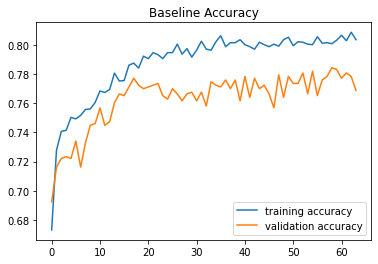

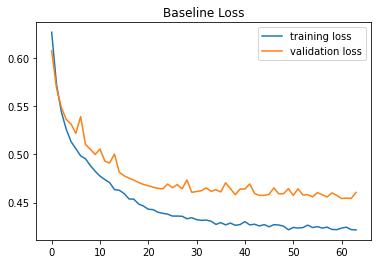

In [ ]:
def eval_different_model_archs():
  #Create different types of model architectures.

  

  
  architectures = [
                   [10 for _ in range(1)],
                   [20 for _ in range(1)],
                   [50 for _ in range(1)],
                   [100 for _ in range(1)],
                   [200 for _ in range(1)],
                   [1000 for _ in range(1)],

                   [10 for _ in range(2)],
                   [20 for _ in range(2)],
                   [50 for _ in range(2)],
                   [100 for _ in range(2)],
                   [200 for _ in range(2)],                   
                   [1000 for _ in range(2)],

                   [10 for _ in range(3)],
                   [20 for _ in range(3)],
                   [50 for _ in range(3)],
                   [100 for _ in range(3)],
                   [200 for _ in range(3)],
                   [1000 for _ in range(3)],
                   
                   [10 for _ in range(4)],
                   [20 for _ in range(4)],
                   [50 for _ in range(4)],
                   [100 for _ in range(4)],
                   [200 for _ in range(4)],
                   [1000 for _ in range(4)],

                   [10 for _ in range(5)],
                   [20 for _ in range(5)],
                   [50 for _ in range(5)],
                   [100 for _ in range(5)],
                   [200 for _ in range(5)],
                   [1000 for _ in range(5)],
                  ]

  # Build a model per architecture                 
  print('building the models')
  models = [build_model(n) for n in architectures]

  # Train each model
  print('training the models')
  histories = [ train_model(model, df_x_train, df_y_train, df_x_val, df_y_val,architectures[i],epochs=64) for i,model in enumerate(models)]


  print('------histories-----')
  print(histories)
  for history in histories:
    print(history.history)

  print('-----')
  for i, history in enumerate(histories):
    print(f'{i}: {max(history.history["val_accuracy"])} {architectures[i]}')


  print('evaluating the models')
  evaluations = [ model.evaluate(df_x_test, df_y_test, batch_size=128) for model in models]

  for i, evaluation in enumerate(evaluations):
    print(f'{i} evaluation = {evaluation} history = {max(histories[i].history["val_accuracy"])} architecture = {architectures[i]}')



# The best architecture is a model with 2 hidden layers, each layer containing 50 nodes.
def eval_chosen_model():
  chosen_arch = [50,50]
  chosen_model = build_model(chosen_arch)
  history =   train_model(chosen_model, df_x_train, df_y_train, df_x_val, df_y_val,chosen_arch,epochs=64) 
  print(history.history)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.legend(['training accuracy','validation accuracy'])
  plt.title('Baseline Accuracy')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.legend(['training loss','validation loss'])
  plt.title('Baseline Loss')
  plt.show()

eval_chosen_model()  


Test Data on selected model

[0.         0.         0.         0.0047619  0.0047619  0.00952381
 0.00952381 0.01428571 0.01428571 0.01904762 0.01904762 0.02380952
 0.02380952 0.02857143 0.02857143 0.03333333 0.03333333 0.03809524
 0.03809524 0.04285714 0.04285714 0.04761905 0.04761905 0.05238095
 0.05238095 0.06190476 0.06190476 0.06666667 0.06666667 0.07142857
 0.07142857 0.07619048 0.07619048 0.08095238 0.08095238 0.09047619
 0.09047619 0.13333333 0.13333333 0.14285714 0.14285714 0.15238095
 0.15238095 0.15714286 0.15714286 0.16190476 0.16190476 0.17619048
 0.17619048 0.18571429 0.18571429 0.19047619 0.19047619 0.2
 0.2        0.2047619  0.2047619  0.20952381 0.20952381 0.22380952
 0.22380952 0.22857143 0.22857143 0.23809524 0.23809524 0.24285714
 0.24285714 0.24761905 0.24761905 0.25238095 0.25238095 0.25714286
 0.25714286 0.26190476 0.26190476 0.26666667 0.26666667 0.2952381
 0.2952381  0.3        0.3        0.3047619  0.3047619  0.30952381
 0.30952381 0.31428571 0.31428571 0.34285714 0.34285714 0.35238095
 0.

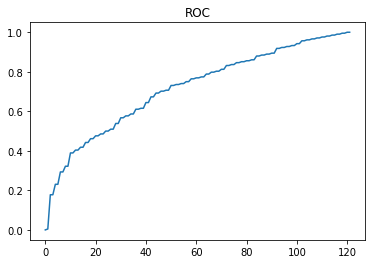

In [ ]:
from sklearn.metrics import roc_curve,auc

 
#  predictions = chosen_model.evaluate(df_x_test, df_y_test, batch_size=128)
#  print(chosen_model.metrics_names)


y_pred_keras = chosen_model.predict(df_x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(df_y_test, y_pred_keras)

print(fpr_keras)
plt.plot(tpr_keras)
plt.title("ROC")
plt.show()


# Section 8:Changing Activation Functions in the Baseline model

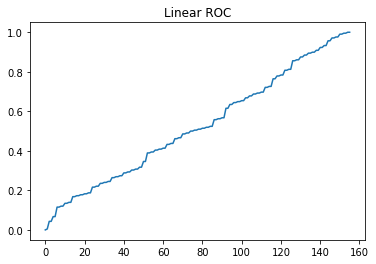

In [ ]:

linear_model = build_model([50,50], hidden_activation='linear')
history =   train_model(chosen_model, df_x_train, df_y_train, df_x_val, df_y_val,chosen_arch,epochs=64) 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.title('Linear Activation Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.title('Linear Activation Loss')
plt.show()

y_pred_linear = linear_model.predict(df_x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(df_y_test, y_pred_linear)

plt.plot(tpr_keras)
plt.title("Linear ROC")
plt.show()
# for key, value in history.history.items() :
#     print (key)

# Section 6:  Increasing the architecture size until google crashes
I'm just going to create a ginormous model (100 layers, 1000 nodes per layer, 99,109,001 parameters), and let it cook for a while.

In [ ]:
crash_model = build_model([1000 for _ in range(100)])
# print(crash_model.summary())
history = train_model(crash_model, df_x_train, df_y_train, df_x_val, df_y_val, 'crash model', use_early_stop=True)

# Section 8: Changing activation function of output layer to 'relu'


training model [50, 50]


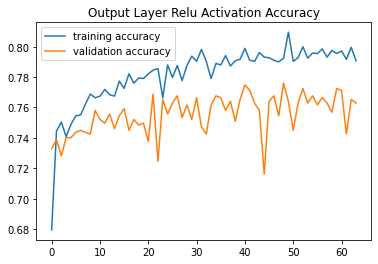

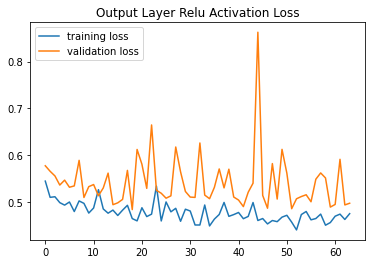

In [ ]:
relu_output_model = build_model([50,50], output_activation='relu')
history =   train_model(relu_output_model, df_x_train, df_y_train, df_x_val, df_y_val,[50,50],epochs=64) 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.title('Output Layer Relu Activation Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.title('Output Layer Relu Activation Loss')
plt.show()



# Section 8.1: Changing activation function of output layer to 'linear'

training model [50, 50]


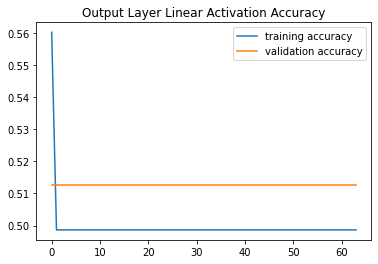

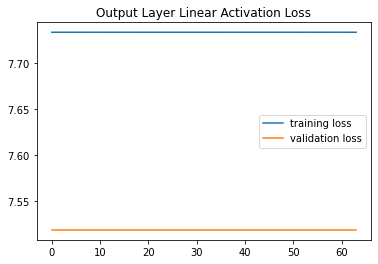

In [ ]:
linear_output_model = build_model([50,50], output_activation='linear')
history =   train_model(linear_output_model, df_x_train, df_y_train, df_x_val, df_y_val,[50,50],epochs=64) 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.title('Output Layer Linear Activation Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.title('Output Layer Linear Activation Loss')
plt.show()

# Section 10: Overfitting the data

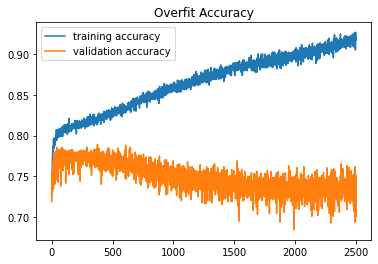

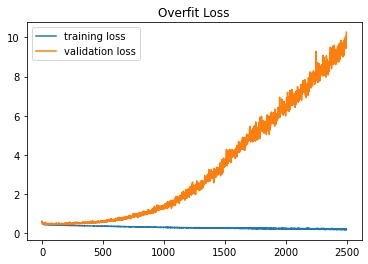

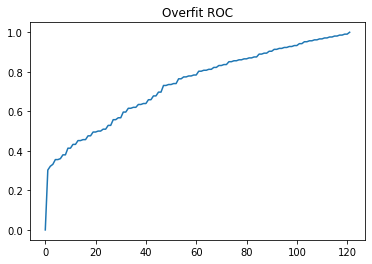

0.8551968864468865


In [ ]:
# overfit_model = build_model([50,50,50,50])
# history =   train_model(overfit_model, df_x_train, df_y_train, df_x_val, df_y_val,[50,50,50,50],epochs=2500) 



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.title('Overfit Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.title('Overfit Loss')
plt.show()

y_pred_overfit = overfit_model.predict(df_x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(df_y_test, y_pred_overfit)

plt.plot(tpr_keras)
plt.title("Overfit ROC")
plt.show()

auc = auc(fpr_keras, tpr_keras)
print(auc)



# Grad Only: Section 14: Code a function that represents your model

In [ ]:

model = build_model([50,50])
train_model(model, df_x_train, df_y_train, df_x_val, df_y_val,[50,50],epochs=64)

# use the keras model to predict the outcomes.  
# Round the output to create a binary classifier
predictions = np.round(model.predict(df_x_test))

def relu(_x):
    return np.maximum(_x, 0)

def sigmoid(_x):
    return 1/(1+np.exp(-_x))

my_model = [
    {'weights':layer.get_weights()[0], 
     'bias':layer.get_weights()[1],
     'activation':layer.get_config()['activation']
     } for layer in model.layers]

def my_predict(_input, _model):
  _a = _input
  _activations = {'relu':relu,'sigmoid':sigmoid}

  for layer in _model:
    _a = _activations[layer['activation']](np.dot(_a,layer['weights'])+layer['bias'])

  return _a

# use my_predict function to predict the outcomes.  
# Round the output to create a binary classifier
my_predictions = np.round(my_predict(df_x_test, my_model))

print('are predictions equal?: ',(predictions == my_predictions).all())



training model [50, 50]
are predictions equal?:  True
